In [1]:
import gprofiler_plotting
from gprofiler import GProfiler
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams

In [2]:
#set plotting parameters
plt.rcParams['figure.figsize']=(8,8)

In [3]:
#functional analysis, go term overrepresentation
def functional_analysis(query, background, output_folder, name, database = "GO:BP", threshold = 0.05):
    gp = GProfiler(return_dataframe=True, user_agent='g:GOSt')
    gp_results = gp.profile(organism='mmusculus', sources=[database], user_threshold=threshold,
                               significance_threshold_method='fdr', 
                               background=background, 
                               query=query,
                               no_evidences=False)
    gp_results.to_csv("%s/%s_%s.csv" % (output_folder,name,database))
    try:
        gprofiler_plotting.plot_enrich(gp_results,save = "%s/%s_%s.pdf" % (output_folder,name,database))
    except:
        pass

In [4]:
#read background genes
background = pd.read_csv('../output/background.csv')

In [5]:
background = list(background.x)

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


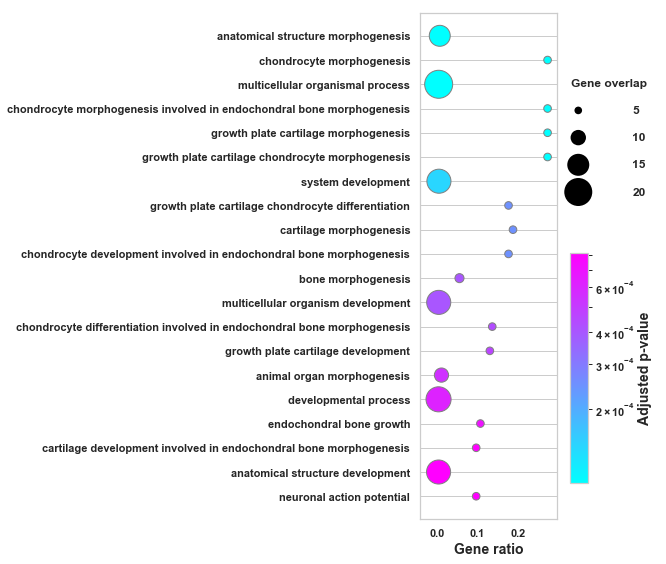

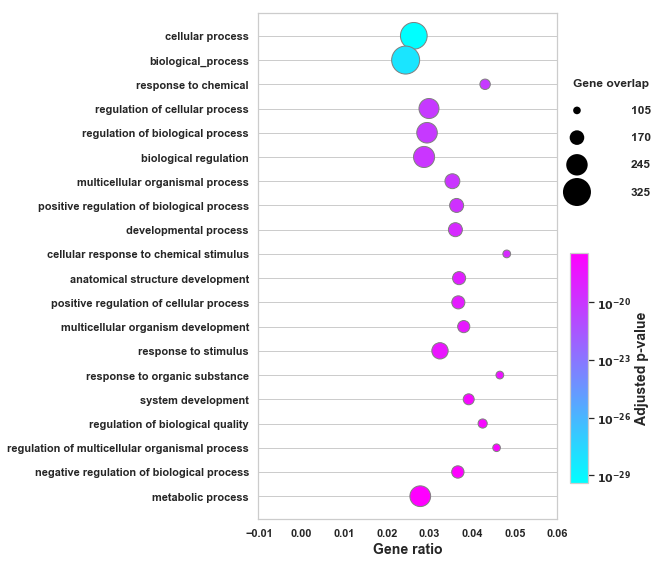

In [6]:
de = pd.read_csv('../output/glia_DE.csv')

glia1_markers = de[(de.p_val_adj < 0.01) & (de.avg_logFC > 0)]
glia2_markers = de[(de.p_val_adj < 0.01) & (de.avg_logFC < 0)]


glia1_markers = list(glia1_markers.iloc[:,0])
glia2_markers = list(glia2_markers.iloc[:,0])


functional_analysis(glia1_markers, background, '../output/functional_analysis', "glia_1_0.01", database = "GO:BP", threshold = 0.05)

functional_analysis(glia2_markers, background, '../output/functional_analysis', "glia_2_0.01", database = "GO:BP", threshold = 0.05)